In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import shapiro

In [115]:
data = pd.read_csv(r"D:\placement\projects datasets and codes\automobiles\automobile.csv")

In [116]:
data

,Unnamed: 0,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,164,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,164,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,-1,95,volvo,gas,std,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,202,-1,95,volvo,gas,std,four,sedan,rwd,front,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


<Axes: >

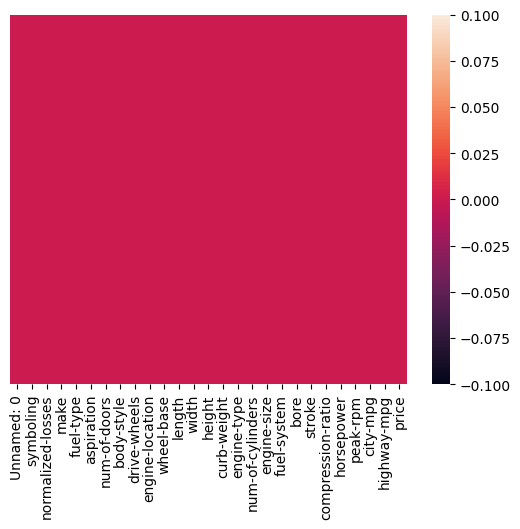

In [117]:
sns.heatmap(data.isnull() , yticklabels = False)

In [118]:
def convert_null(val):
    if val == "?":
        return np.nan
    return val


In [119]:
for col in data.columns:
    data[col] = data[col].apply(convert_null)

<Axes: >

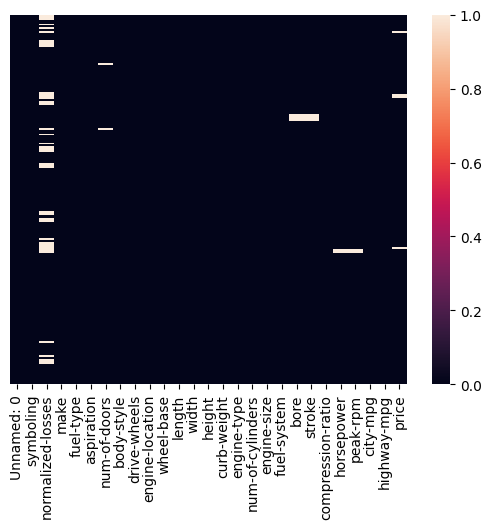

In [120]:
sns.heatmap(data.isnull() , yticklabels = False)

In [121]:
data.drop(columns=["normalized-losses"],inplace=True)

In [122]:
data

,Unnamed: 0,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,3,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,4,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [123]:
data.dropna(inplace=True)

In [124]:
data.drop("Unnamed: 0",axis = 1 , inplace = True)

In [125]:
def eda_summary(df):
    """
    Perform EDA for each variable in the DataFrame.
    """
    for col in df.columns:
        print(f"\n--- EDA for '{col}' ---")
        print(f"Data Type: {df[col].dtype}")
        print(f"Number of unique values: {df[col].nunique()}")
        print(f"Number of missing values: {df[col].isna().sum()}")
        print(f"Description:\n{df[col].describe()}")
        
        # Visualization
        plt.figure(figsize=(10, 4))
        
        if df[col].dtype == 'object':  # Categorical
            sns.countplot(data=df, x=col)
            plt.xticks(rotation=45)
            plt.title(f"Distribution of {col}")
        else:  # Numerical
            sns.histplot(df[col], kde=True)
            plt.title(f"Distribution of {col}")
            
        plt.show()

In [126]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.797927,98.923834,174.326425,65.893782,53.869948,2561.507772,128.124352,10.143627,25.326425,30.787565
std,1.235582,6.152409,12.478593,2.137795,2.394770,526.700026,41.590452,3.977491,6.387828,6.816910
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,98.000000,8.500000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2414.000000,120.000000,9.000000,25.000000,30.000000
75%,2.000000,102.400000,184.600000,66.900000,55.700000,2952.000000,146.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [127]:
data['price'] = data['price'].apply(int)
data['peak-rpm'] = data['peak-rpm'].apply(int)
data['horsepower'] = data['horsepower'].apply(int)
data['stroke'] = data['stroke'].apply(float)
data['bore'] = data['bore'].apply(float)


# outliers by zscore


In [128]:
mu  = np.mean(data['price'])
sig = np.var(data['price'])

def sec(val):
    return (val - mu)/np.sqrt(sig)
zscore = data['price'].apply(sec)

In [129]:
zscore = list(zscore)

In [130]:
for i in range(len(zscore)):
    if abs(zscore[i]) > 3:
        print([i , zscore[i]])

[15, 3.4741730819282663]
[64, 3.4301726329809763]
[65, 3.9804881071386315]


In [131]:
data.iloc[[15 , 64 , 65]]

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
16,0,bmw,gas,std,two,sedan,rwd,front,103.5,193.8,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315
73,0,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,208.1,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960
74,1,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,199.2,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400


In [132]:
prices_to_remove = [40960, 41315, 45400]
data = data[~data['price'].isin(prices_to_remove)]

In [133]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,0.805263,98.715263,173.915263,65.820526,53.847895,2544.084211,125.826316,3.324158,3.247053,10.177474,102.221053,5104.473684,25.494737,30.989474,12822.815789
std,1.242533,5.902410,12.112053,2.059216,2.402197,511.319305,37.181328,0.269360,0.317573,3.999682,36.892000,467.819988,6.293313,6.666658,7251.943667
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,17.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.025000,52.000000,2141.250000,98.000000,3.150000,3.102500,8.600000,70.000000,4800.000000,20.000000,25.000000,7701.250000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2412.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10096.500000
75%,2.000000,102.400000,183.400000,66.500000,55.675000,2924.750000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.500000,16500.000000
max,3.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,37028.000000


In [134]:
data.shape

(190, 25)

C:\Users\gunav\AppData\Local\Temp\ipykernel_31112\2309002448.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['price'])


<Axes: xlabel='price', ylabel='Density'>

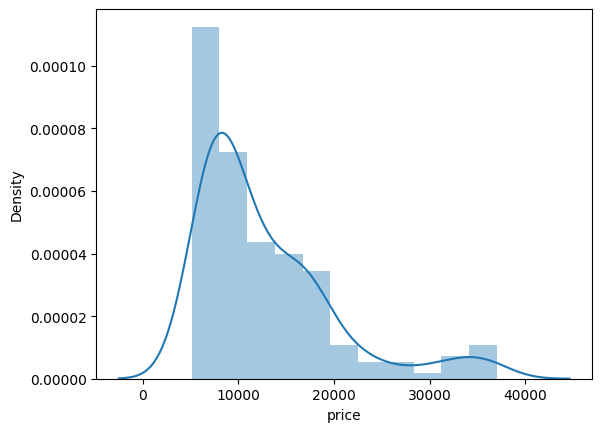

In [135]:
sns.distplot(data['price'])

In [136]:
log_y = data['price'].apply(np.log)

C:\Users\gunav\AppData\Local\Temp\ipykernel_31112\423497309.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_y)


<Axes: xlabel='price', ylabel='Density'>

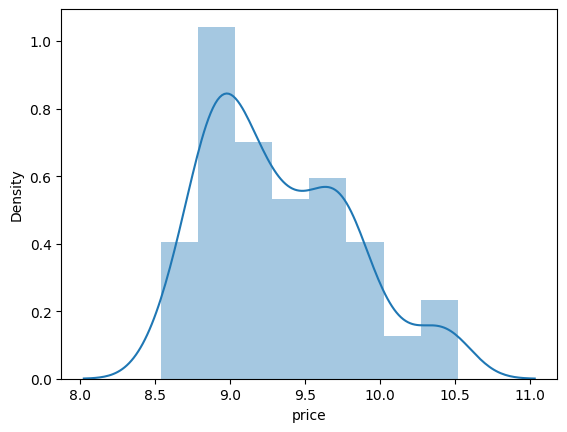

In [137]:
sns.distplot(log_y)

In [138]:
root_y = data['price'].apply(np.sqrt)

C:\Users\gunav\AppData\Local\Temp\ipykernel_31112\2620999431.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(root_y)


<Axes: xlabel='price', ylabel='Density'>

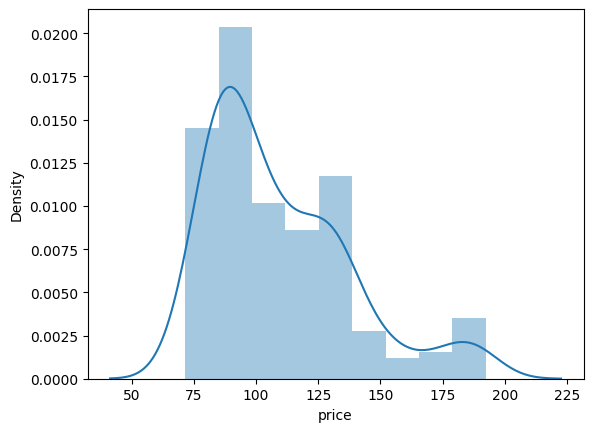

In [139]:
sns.distplot(root_y)

In [140]:
print(f"logy{shapiro(log_y)}")
print(f"Root Y{shapiro(root_y)}")
shapiro(data['price'])

logyShapiroResult(statistic=np.float64(0.9499400511989339), pvalue=np.float64(3.2130411930727824e-06))
Root YShapiroResult(statistic=np.float64(0.8982722488925792), pvalue=np.float64(4.1492832892444547e-10))


ShapiroResult(statistic=np.float64(0.8211612291256641), pvalue=np.float64(5.2744354728519726e-14))

In [141]:
data.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [142]:
data.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,0.805263,98.715263,173.915263,65.820526,53.847895,2544.084211,125.826316,3.324158,3.247053,10.177474,102.221053,5104.473684,25.494737,30.989474,12822.815789
std,1.242533,5.902410,12.112053,2.059216,2.402197,511.319305,37.181328,0.269360,0.317573,3.999682,36.892000,467.819988,6.293313,6.666658,7251.943667
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,17.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.025000,52.000000,2141.250000,98.000000,3.150000,3.102500,8.600000,70.000000,4800.000000,20.000000,25.000000,7701.250000
50%,1.000000,97.000000,173.200000,65.400000,54.100000,2412.000000,119.500000,3.310000,3.290000,9.000000,95.000000,5100.000000,25.000000,30.000000,10096.500000
75%,2.000000,102.400000,183.400000,66.500000,55.675000,2924.750000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,35.500000,16500.000000
max,3.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,37028.000000


In [143]:
data.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [144]:
data['aspiration'].value_counts()

aspiration
std      155
turbo     35
Name: count, dtype: int64

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          190 non-null    int64  
 1   make               190 non-null    object 
 2   fuel-type          190 non-null    object 
 3   aspiration         190 non-null    object 
 4   num-of-doors       190 non-null    object 
 5   body-style         190 non-null    object 
 6   drive-wheels       190 non-null    object 
 7   engine-location    190 non-null    object 
 8   wheel-base         190 non-null    float64
 9   length             190 non-null    float64
 10  width              190 non-null    float64
 11  height             190 non-null    float64
 12  curb-weight        190 non-null    int64  
 13  engine-type        190 non-null    object 
 14  num-of-cylinders   190 non-null    object 
 15  engine-size        190 non-null    int64  
 16  fuel-system        190 non-null

In [146]:
df_encoded = pd.get_dummies(data, drop_first=True).astype(int)

In [147]:
df_encoded.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,...,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,0.805263,98.252632,173.415789,65.336842,53.378947,2544.084211,125.826316,2.878947,2.884211,9.889474,...,0.805263,0.121053,0.005263,0.005263,0.336842,0.100000,0.005263,0.447368,0.047368,0.005263
std,1.242533,5.956577,12.015896,2.070762,2.432926,511.319305,37.181328,0.327050,0.352261,4.026814,...,0.397044,0.327050,0.072548,0.072548,0.473879,0.300793,0.072548,0.498536,0.212987,0.072548
min,-2.000000,86.000000,141.000000,60.000000,47.000000,1488.000000,61.000000,2.000000,2.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,94.000000,166.000000,64.000000,52.000000,2141.250000,98.000000,3.000000,3.000000,8.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,97.000000,173.000000,65.000000,54.000000,2412.000000,119.500000,3.000000,3.000000,9.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,102.000000,183.000000,66.000000,55.000000,2924.750000,141.000000,3.000000,3.000000,9.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,3.000000,115.000000,202.000000,71.000000,59.000000,4066.000000,326.000000,3.000000,4.000000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 190 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   symboling                190 non-null    int64
 1   wheel-base               190 non-null    int64
 2   length                   190 non-null    int64
 3   width                    190 non-null    int64
 4   height                   190 non-null    int64
 5   curb-weight              190 non-null    int64
 6   engine-size              190 non-null    int64
 7   bore                     190 non-null    int64
 8   stroke                   190 non-null    int64
 9   compression-ratio        190 non-null    int64
 10  horsepower               190 non-null    int64
 11  peak-rpm                 190 non-null    int64
 12  city-mpg                 190 non-null    int64
 13  highway-mpg              190 non-null    int64
 14  price                    190 non-null    int64
 15  make_audi  

In [149]:
df_encoded.head()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,...,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,88,168,64,48,2548,130,3,2,9,...,1,0,0,0,0,0,0,1,0,0
1,3,88,168,64,48,2548,130,3,2,9,...,1,0,0,0,0,0,0,1,0,0
2,1,94,171,65,52,2823,152,2,3,9,...,0,1,0,0,0,0,0,1,0,0
3,2,99,176,66,54,2337,109,3,3,10,...,1,0,0,0,0,0,0,1,0,0
4,2,99,176,66,54,2824,136,3,3,8,...,0,0,0,0,0,0,0,1,0,0


In [150]:
df_encoded.columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_saab', 'make_subaru', 'make_toyota',
       'make_volkswagen', 'make_volvo', 'fuel-type_gas', 'aspiration_turbo',
       'num-of-doors_two', 'body-style_hardtop', 'body-style_hatchback',
       'body-style_sedan', 'body-style_wagon', 'drive-wheels_fwd',
       'drive-wheels_rwd', 'engine-location_rear', 'engine-type_l',
       'engine-type_ohc', 'engine-type_ohcf', 'engine-type_ohcv',
       'num-of-cylinders_five', 'num-of-cylinders_four',
       'num-of-cylinders_six', 'num-of-cylinders_three',
       'num-of-cylinde

In [151]:
for col in df_encoded.columns:
    print(col)

symboling
wheel-base
length
width
height
curb-weight
engine-size
bore
stroke
compression-ratio
horsepower
peak-rpm
city-mpg
highway-mpg
price
make_audi
make_bmw
make_chevrolet
make_dodge
make_honda
make_isuzu
make_jaguar
make_mazda
make_mercedes-benz
make_mercury
make_mitsubishi
make_nissan
make_peugot
make_plymouth
make_porsche
make_saab
make_subaru
make_toyota
make_volkswagen
make_volvo
fuel-type_gas
aspiration_turbo
num-of-doors_two
body-style_hardtop
body-style_hatchback
body-style_sedan
body-style_wagon
drive-wheels_fwd
drive-wheels_rwd
engine-location_rear
engine-type_l
engine-type_ohc
engine-type_ohcf
engine-type_ohcv
num-of-cylinders_five
num-of-cylinders_four
num-of-cylinders_six
num-of-cylinders_three
num-of-cylinders_twelve
fuel-system_2bbl
fuel-system_idi
fuel-system_mfi
fuel-system_mpfi
fuel-system_spdi
fuel-system_spfi


In [152]:
len(df_encoded.columns)

60

In [153]:
df_encoded.shape

(190, 60)

In [154]:
Y = df_encoded['price']
X = df_encoded.drop('price'  ,axis = 1)

In [155]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [156]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

linear regression Model without removing multicollinearity

In [159]:
# Perform Breusch-Pagan test
# We need to add a constant column to the independent variables
X_train_sm = sm.add_constant(X_train)
X_test_sm = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)
model = sm.OLS(y_train, X_train_sm).fit()
residuals = model.resid
print(model.summary())




                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     71.20
Date:                Sun, 01 Sep 2024   Prob (F-statistic):           9.06e-59
Time:                        12:22:30   Log-Likelihood:                -1284.2
No. Observations:                 152   AIC:                             2680.
Df Residuals:                      96   BIC:                             2850.
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3

Ridge lasso without removing multicoll.

In [160]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge and Lasso
alpha_values = np.logspace(-10, 10, 50)
ridge = Ridge()
lasso = Lasso()

ridge_cv = GridSearchCV(ridge, {'alpha': alpha_values}, cv=5, scoring='r2')
lasso_cv = GridSearchCV(lasso, {'alpha': alpha_values}, cv=5, scoring='r2')

# Fit models
ridge_cv.fit(X_train_sm, y_train)
lasso_cv.fit(X_train_sm, y_train)

print(f'Best alpha for Ridge: {ridge_cv.best_params_["alpha"]}')
print(f'Best alpha for Lasso: {lasso_cv.best_params_["alpha"]}')

# Predict and evaluate Ridge
ridge_best = ridge_cv.best_estimator_
y_pred_ridge = ridge_best.predict(X_test_sm)
r2_ridge = r2_score(y_test, y_pred_ridge)


print(f'Ridge Regression R2: {r2_ridge}')


# Predict and evaluate Lasso
lasso_best = lasso_cv.best_estimator_
y_pred_lasso = lasso_best.predict(X_test_sm)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression R2: {r2_lasso}')




C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.27095e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.98638e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.15594e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\gunav\AppD

Best alpha for Ridge: 0.09540954763499963
Best alpha for Lasso: 4.094915062380419
Ridge Regression R2: 0.9210840564884467
Lasso Regression R2: 0.9133891857628154


C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


# null hypo= homoscadasticity is accepted

In [158]:
bp_test = het_breuschpagan(residuals, X_train_sm)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': np.float64(69.26235044339563), 'LM-Test p-value': np.float64(0.1696640111912708), 'F-Statistic': np.float64(1.4611762004138344), 'F-Test p-value': np.float64(0.05208971087556576)}


# remove multicollinearity


In [161]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
    return vif_data


In [162]:
vif_df = calculate_vif(X_train)
print("Initial VIF values:")
print(vif_df)


C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Initial VIF values:
                    feature           VIF
0                 symboling  1.108990e+01
1                wheel-base  2.167791e+01
2                    length  2.735983e+01
3                     width  2.067198e+01
4                    height  9.094524e+00
5               curb-weight  4.763795e+01
6               engine-size  5.536396e+01
7                      bore  4.248948e+00
8                    stroke  6.629261e+00
9         compression-ratio  1.743118e+02
10               horsepower  5.851125e+01
11                 peak-rpm  6.931033e+00
12                 city-mpg  5.062095e+01
13              highway-mpg  3.973867e+01
14                make_audi  1.328701e+01
15                 make_bmw  8.046373e+00
16           make_chevrolet  2.832646e+00
17               make_dodge  8.250229e+00
18               make_honda  2.238583e+01
19               make_isuzu  4.906404e+00
20              make_jaguar  9.491509e+00
21               make_mazda  1.115156e+01
22       make_

C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [197]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to calculate VIF and remove features with VIF > threshold
def remove_high_vif_features(X, threshold=10):
    while True:
        vif_data = pd.DataFrame()
        vif_data["feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        max_vif = vif_data["VIF"].max()
        
        if max_vif > threshold:
            feature_to_remove = vif_data.loc[vif_data["VIF"].idxmax(), "feature"]
            X = X.drop(columns=[feature_to_remove])
        else:
            break
    
    return X, vif_data

# Example usage with X_train
X_train_reduced, final_vif_df = remove_high_vif_features(X_train)
# Apply the same feature selection to X_test
X_test_reduced = X_test[X_train_reduced.columns]
# Print the final VIF DataFrame
print("Final VIF values after removing features with VIF greater than 10:")
print(final_vif_df)


C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\lin

Final VIF values after removing features with VIF greater than 10:
                    feature       VIF
0                 symboling  6.481206
1                 make_audi  2.825594
2                  make_bmw  2.148518
3            make_chevrolet  1.142317
4                make_dodge  1.720043
5                make_honda  1.253226
6                make_isuzu  2.725020
7               make_jaguar  2.641662
8                make_mazda  1.937558
9        make_mercedes-benz  4.253093
10             make_mercury  1.263865
11          make_mitsubishi  2.637868
12              make_nissan  2.630996
13            make_plymouth  1.546900
14             make_porsche  4.661725
15                make_saab  1.511655
16              make_toyota  2.895494
17          make_volkswagen  1.535618
18               make_volvo  3.586337
19         aspiration_turbo  3.069805
20         num-of-doors_two  5.950474
21       body-style_hardtop  1.674088
22     body-style_hatchback  3.604320
23         body-style

C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsm

linear regression after removing the multi.

In [216]:
import statsmodels.api as sm

# Fit the OLS model
model = sm.OLS(y_train, X_train_reduced).fit()
residuals1= y_test-y_pred_b
residuals=model.resid
# View model summary (optional)
print(model.summary())
y_pred_b = model.predict(X_test_reduced)
r = r2_score(y_pred_b , y_test)
print(f"The R2 score on test is: {r}")


                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.971
Method:                 Least Squares   F-statistic:                              138.8
Date:                Sun, 01 Sep 2024   Prob (F-statistic):                    1.37e-79
Time:                        13:47:36   Log-Likelihood:                         -1387.5
No. Observations:                 152   AIC:                                      2849.
Df Residuals:                     115   BIC:                                      2961.
Df Model:                          37                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [210]:
residuals1

190      360.683910
195    -2854.086109
123     3257.564766
77     -1069.110403
113     1945.663197
17     13366.180558
10     -4186.214764
18    -10692.097017
156     -728.566763
139     -525.110671
121      309.807126
107    -2875.109383
20      -766.358415
179      -98.486336
97       486.001465
135      939.456832
116     1934.240673
78      -589.110403
66      5016.289096
47     -3300.000000
33     -1319.272704
26       187.202423
170      303.281947
109    -2309.336803
80     -3018.911976
142     -502.976556
138    -2460.110671
21      -456.946632
50     -3067.706761
87     -4398.777861
183    -2047.202209
79     -4595.926917
5      -2363.009627
147     1683.125434
184     -853.144746
178      461.513664
90      1758.560349
124    -3865.140928
dtype: float64

as the linear regression model is overfitting to the training  data so we use the l1 l2 regul.

In [183]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Ridge and Lasso
alpha_values = np.logspace(-10, 10, 50)
ridge = Ridge()
lasso = Lasso()

ridge_cv = GridSearchCV(ridge, {'alpha': alpha_values}, cv=5, scoring='r2')
lasso_cv = GridSearchCV(lasso, {'alpha': alpha_values}, cv=5, scoring='r2')

# Fit models
ridge_cv.fit(X_train_reduced, y_train)
lasso_cv.fit(X_train_reduced, y_train)

print(f'Best alpha for Ridge: {ridge_cv.best_params_["alpha"]}')
print(f'Best alpha for Lasso: {lasso_cv.best_params_["alpha"]}')

# Predict and evaluate Ridge
ridge_best = ridge_cv.best_estimator_
y_pred_ridge = ridge_best.predict(X_test_reduced)
r2_ridge = r2_score(y_test, y_pred_ridge)


print(f'Ridge Regression R2: {r2_ridge}')


# Predict and evaluate Lasso
lasso_best = lasso_cv.best_estimator_
y_pred_lasso = lasso_best.predict(X_test_reduced)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression R2: {r2_lasso}')




C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.611e+07, tolerance: 7.218e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.491e+07, tolerance: 5.896e+05
  model = cd_fast.enet_coordinate_descent(
C:\Users\gunav\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\loca

Best alpha for Ridge: 0.09540954763499963
Best alpha for Lasso: 10.481131341546874
Ridge Regression R2: 0.7890328838282821
Lasso Regression R2: 0.7839008571848591


l1 l2 gives better r2 score

In [191]:
from statsmodels.stats.stattools import durbin_watson

residuals = model.resid

# Perform the Durbin-Watson test
dw_stat = durbin_watson(residuals)

print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 1.9879918634485427


In [201]:
X_train_reduced_c= sm.add_constant(X_train_reduced)

In [202]:
bp_test = het_breuschpagan(residuals1, X_train_reduced_c)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': np.float64(98.10367855729513), 'LM-Test p-value': np.float64(3.2638839142648266e-07), 'F-Statistic': np.float64(5.608274922967953), 'F-Test p-value': np.float64(5.707494571574805e-13)}


dw test signifies that residuals are uncorrelated 

In [186]:

ridge_coefficients = pd.Series(ridge_best.coef_, index=X_train_reduced.columns)
lasso_coefficients = pd.Series(lasso_best.coef_, index=X_train_reduced.columns)

# Combine the coefficients into a single DataFrame
coefficients_df = pd.DataFrame({
    'Ridge Regression': ridge_coefficients,
    'Lasso Regression': lasso_coefficients
})

# Print the DataFrame
print(coefficients_df)


                         Ridge Regression  Lasso Regression
symboling                      112.699579         81.839150
make_audi                     5075.089289       6205.588714
make_bmw                      5162.782392       6065.857679
make_chevrolet               -2281.823593         -0.000000
make_dodge                   -3076.733398      -1211.499905
make_honda                   -2593.998227      -1423.514463
make_isuzu                   -5609.703630      -2840.929731
make_jaguar                  15903.320050      18336.795315
make_mazda                    -580.240281        625.094227
make_mercedes-benz           14506.074526      14954.023443
make_mercury                   -17.735880          0.000000
make_mitsubishi              -1704.808011         -0.000000
make_nissan                  -2291.590543       -866.894200
make_plymouth                -3791.713925      -1964.287143
make_porsche                  8555.664751       8946.131363
make_saab                     2649.48713

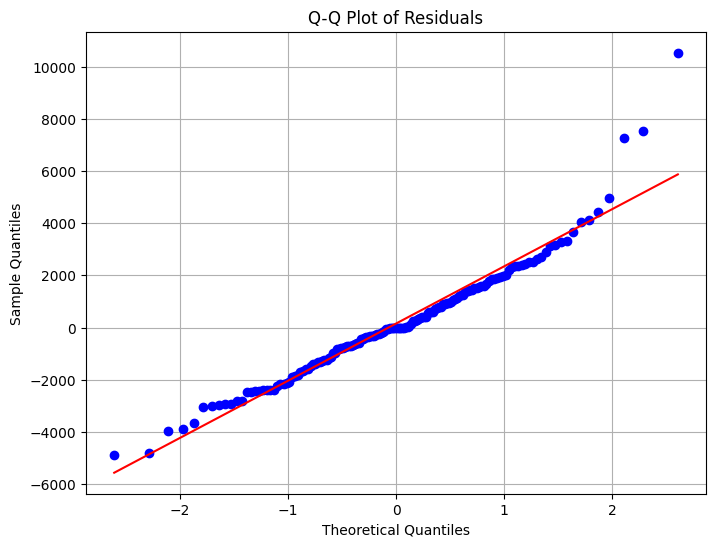

In [187]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

model = sm.OLS(y_train, X_train_reduced).fit()

# Get the residuals
residuals = model.resid

# Plot Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()


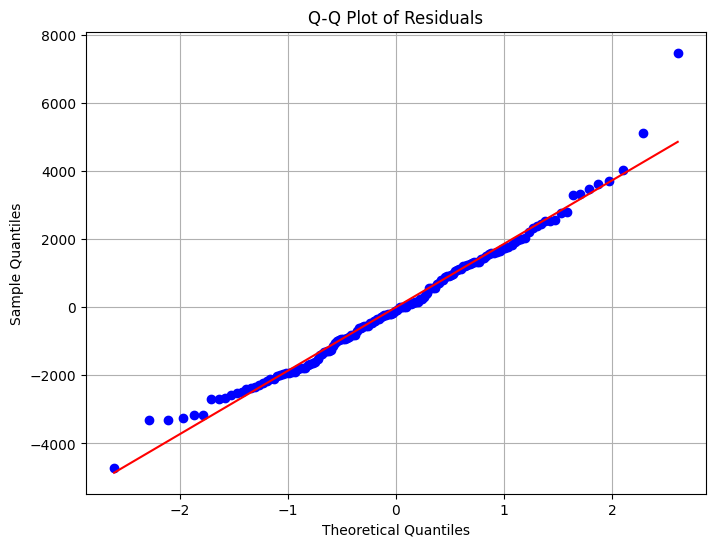

In [188]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats


# Get the residuals
residuals = y_train - lasso_best.predict(X_train_reduced)

# Plot Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

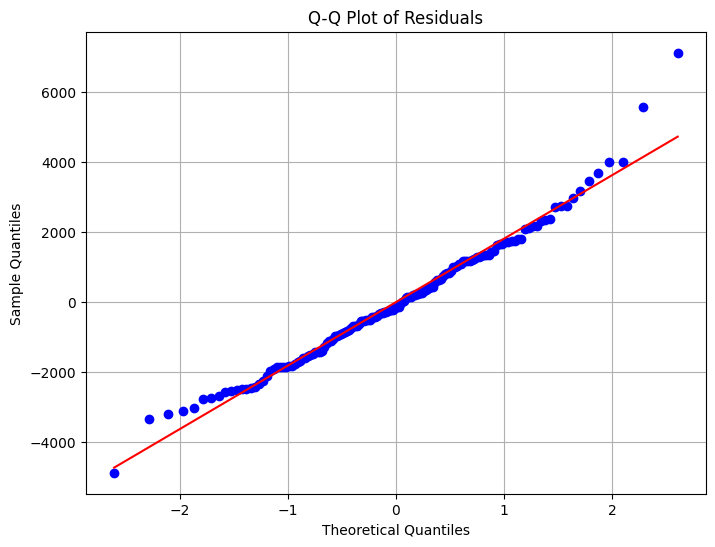

In [189]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats


# Get the residuals
residuals = y_train - ridge_best.predict(X_train_reduced)

# Plot Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

all the above plots shows normality

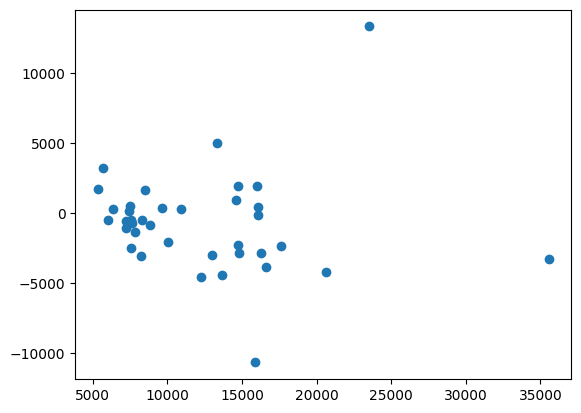

In [220]:
plt.scatter(y_pred_b,residuals1)